In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import VotingClassifier, StackingClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Group_8_data_cleaned.csv')

In [3]:
# Splitting the data to input data and output data
X=df.drop(['Class', 'User'],axis=1)
y=df['Class']

In [4]:
#split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# Scaling the data using standard scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [6]:
clf1 = SGDClassifier(loss='hinge', alpha= 0.1, learning_rate='optimal', random_state=0)
clf2 = KNeighborsClassifier(n_neighbors= 5)
clf3 = RandomForestClassifier(criterion= 'gini', max_depth= 8, max_features= 'auto', n_estimators= 201, random_state=42)
clf4 = LinearSVC(C= 0.01)
clf5 = SVC(C=100, gamma=0.01, kernel='poly')
clf6 = MLPClassifier(learning_rate= 'adaptive', hidden_layer_sizes= 1000, alpha= 0.001)

In [7]:
Ensemble = VotingClassifier(estimators=[('SGD', clf1),
                                  ('KNN', clf2),
                                 ('RFC',clf3),
                                  ('SVC_lin',clf4),
                                  ('SVC',clf5),
                                  ('MLP',clf6)])

In [8]:
accuracy = []
for clf, name in zip([clf1, clf2, clf3, clf4,clf5,clf6,Ensemble], ['SGD', 'KNN','RFC','SVC_lin','SVC','MLP','VotingClassifier']):
    clf.fit(X_train_scaled, y_train)
    print(name,'Training accuracy:', clf.score(X_train_scaled, y_train))
    print(name, 'Testing accuracy:', clf.score(X_test_scaled, y_test), '\n')
    accuracy.append(clf.score(X_test_scaled, y_test))

SGD Training accuracy: 0.9524384443712728
SGD Testing accuracy: 0.9521106321225832 

KNN Training accuracy: 0.9858229978414371
KNN Testing accuracy: 0.9792991591617226 

RFC Training accuracy: 0.9951157940950499
RFC Testing accuracy: 0.9553971573690725 

SVC_lin Training accuracy: 0.9650788424249076
SVC_lin Testing accuracy: 0.9648299116479576 

SVC Training accuracy: 1.0
SVC Testing accuracy: 0.9944086388663622 

MLP Training accuracy: 1.0
MLP Testing accuracy: 0.9968415211916856 

VotingClassifier Training accuracy: 0.994365784948597
VotingClassifier Testing accuracy: 0.9923598958555636 



In [9]:
accuracy

[0.9521106321225832,
 0.9792991591617226,
 0.9553971573690725,
 0.9648299116479576,
 0.9944086388663622,
 0.9968415211916856,
 0.9923598958555636]

In [10]:
ensemble_pred = Ensemble.predict(X_test_scaled)

In [11]:
print(classification_report(y_test, ensemble_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      4898
           2       0.97      0.99      0.98      4485
           3       1.00      1.00      1.00      4854
           4       1.00      1.00      1.00      4496
           5       1.00      0.97      0.98      4696

    accuracy                           0.99     23429
   macro avg       0.99      0.99      0.99     23429
weighted avg       0.99      0.99      0.99     23429



In [12]:
conf_matrix_ens = confusion_matrix(y_test, ensemble_pred)
conf_matrix_ens

array([[4881,   16,    0,    0,    1],
       [   4, 4455,    6,    0,   20],
       [   2,    2, 4850,    0,    0],
       [   0,    0,    3, 4493,    0],
       [   0,  111,    4,   10, 4571]], dtype=int64)

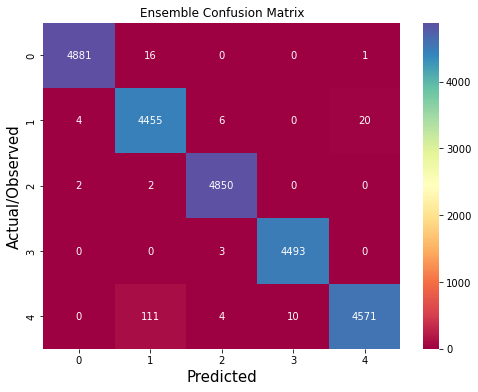

In [16]:
# Confusion matrix heat map
import seaborn as sns
plt.figure(figsize = (8,6))

sns.heatmap(conf_matrix_ens, 
            annot=True, 
            cmap="Spectral",
            fmt = "g"
                      )
plt.title("Ensemble Confusion Matrix")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=15);

# Comparing the individual models and ensemble

In [14]:
models = ["Linear Classifier","KNN", "Random Forest", "SVC Linear", "SVC non-Linear", "MLP", "Ensemble"]

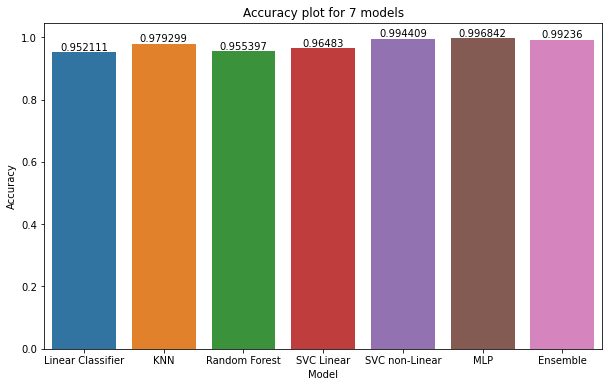

In [15]:
# sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.barplot(x=models, y=accuracy)
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10)
plt.xticks(range(len(models)), models)
plt.title(f"Accuracy plot for {len(accuracy)} models")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()